<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/main/Parcial2/Tierra_plana_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from numpy.polynomial.legendre import leggauss

# Constantes del problema
R = 1  # Radio del disco
z = 0.2  # Altura en la dirección k
g_target = -9.813646  # Valor objetivo de la gravedad en (0, 0, 0.2)
k_const = 1.9429303960  # Constante gravitacional ajustada

# Número de puntos de Gauss-Legendre
N = 50

# Parte (a) - Cargar puntos y pesos de Gauss
def cargar_puntos_pesos_gauss(N):
    r_points, r_weights = leggauss(N)
    phi_points, phi_weights = leggauss(N)

    # Escalar los puntos y pesos a los intervalos [0, R] y [0, 2pi]
    r_points = 0.5 * R * (r_points + 1)  # Transformación de [-1, 1] a [0, R]
    r_weights = 0.5 * R * r_weights      # Ajustar los pesos también

    phi_points = np.pi * (phi_points + 1)  # Transformación de [-1, 1] a [0, 2pi]
    phi_weights = np.pi * phi_weights      # Ajustar los pesos también

    return r_points, r_weights, phi_points, phi_weights

# Parte (b) - Definir la función de la ecuación
def integrand(r, phi, x=0, y=0, z=z):
    """
    Calcula el integrando de la ecuación gravitacional en coordenadas polares.
    """
    denom = (x**2 + y**2 + z**2 - 2*r*x*np.cos(phi) - 2*r*y*np.sin(phi))**(3/2)
    return (z * r) / denom

# Parte (c) - Definir una función para calcular la integral con doble cuadratura
def calcular_campo_gravitacional(x, y, z, N=50):
    """
    Calcula el campo gravitacional g_k(x, y, z) sobre el disco
    usando cuadratura de Gauss con N puntos.
    """
    # Cargar los puntos y pesos de Gauss-Legendre
    r_points, r_weights, phi_points, phi_weights = cargar_puntos_pesos_gauss(N)

    # Inicializar el valor de la integral
    gk_value = 0

    # Doble integración utilizando los puntos de Gauss
    for i in range(N):
        for j in range(N):
            r = r_points[i]
            phi = phi_points[j]
            weight = r_weights[i] * phi_weights[j]  # Producto de los pesos
            gk_value += weight * integrand(r, phi, x, y, z)

    # Multiplicar por la constante gravitacional k
    gk_value *= -k_const

    return gk_value

# Parte (d) - Verificar el valor del campo gravitacional en (0, 0, 0.2)
gk_en_0_0_0_2 = calcular_campo_gravitacional(0, 0, 0.2, N)
print(f"Campo gravitacional gk(0, 0, 0.2) = {gk_en_0_0_0_2} m/s²")

# Verificar si el resultado es cercano al valor objetivo
if np.isclose(gk_en_0_0_0_2, g_target, atol=1e-4):
    print(f"¡El resultado es correcto! g = {gk_en_0_0_0_2} m/s²")
else:
    print(f"El resultado no es correcto. Se obtuvo g = {gk_en_0_0_0_2} m/s²")


Campo gravitacional gk(0, 0, 0.2) = -152.5973964627479 m/s²
El resultado no es correcto. Se obtuvo g = -152.5973964627479 m/s²


<ipython-input-3-a19febc80e69>:32: RuntimeWarning: invalid value encountered in scalar power
  denom = (x**2 + y**2 + z**2 - 2*r*x*np.cos(phi) - 2*r*y*np.sin(phi))**(3/2)


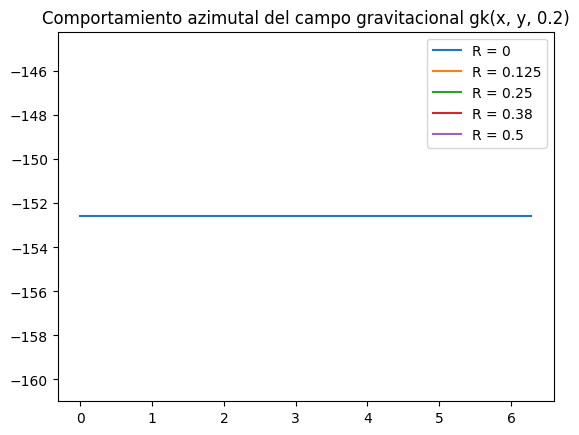

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los valores del radio
radios = [0, 0.125, 0.25, 0.38, 0.5]

# Definir los 10 valores de phi entre 0 y 2*pi
phi_values = np.linspace(0, 2 * np.pi, 10)

# Parte (e) - Estudiar el comportamiento azimutal del campo gk(x, y, 0.2)
def comportamiento_azimutal(radios, phi_values, z=0.2, N=50):
    """
    Calcula el comportamiento azimutal del campo gravitacional para
    diferentes radios y ángulos phi.
    """
    resultados = {}

    # Iterar sobre los diferentes radios
    for r in radios:
        gk_phi = []

        # Iterar sobre los valores de phi
        for phi in phi_values:
            # Convertir de coordenadas polares a cartesianas
            x = r * np.cos(phi)
            y = r * np.sin(phi)

            # Calcular el campo gravitacional en (x, y, z)
            gk_value = calcular_campo_gravitacional(x, y, z, N)
            gk_phi.append(gk_value)

        # Almacenar los resultados para este radio
        resultados[r] = gk_phi

    return resultados

# Calcular el comportamiento azimutal
resultados_azimutales = comportamiento_azimutal(radios, phi_values)

# Parte (e) - Graficar el comportamiento del campo para diferentes radios
for r in radios:
    plt.plot(phi_values, resultados_azimutales[r], label=f'R = {r}')

plt.title('Comportamiento azimutal del campo gravitacional gk(x, y, 0.2)')
plt.legend(loc='upper right')
plt.show()
